In [2]:
from qiskit import *
from qiskit.circuit import *
import matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

The *Einstein-Padolsky-Rosen (EPR) Paradox* is a thought experiment that was proposed by Albert Einstein, Boris Podolsky, and Nathan Rosen in 1935, and is a critique of Copenhagen's Interpretation. It argues that measurements performed on one part of a quantum system can **instantaneously** affect the other part, even if they are separated by large distances, violating the *Principle of Locality.* 

By confirming that quantum systems contain locked-up information, we can resolve this paradox:

We'll take two observers Alice and Bob, whose qubits are **maximally entangled.** They then chose a basis for measurement each, and measure their qubits. A *Check Qubit* is also introduced, which is entangled with Alice's qubit. If the measurements are consistent, it'll be in the state $|0\rangle$, and if they are inconsistent, it'll be in the state $|1\rangle$:

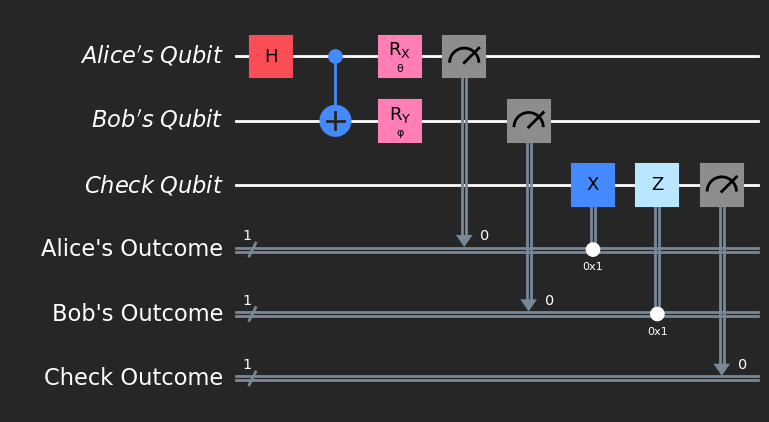

In [3]:
qr_a = QuantumRegister(1, 'Alice\'s Qubit')
qr_b = QuantumRegister(1, 'Bob\'s Qubit')
cr_a = ClassicalRegister(1, 'Alice\'s Outcome')
cr_b = ClassicalRegister(1, 'Bob\'s Outcome')
qr_check = QuantumRegister(1, 'Check Qubit')
cr_check = ClassicalRegister(1, 'Check Outcome')

qc = QuantumCircuit(qr_a, qr_b, qr_check, cr_a, cr_b, cr_check)
qc.h(qr_a)
qc.cx(qr_a, qr_b)

theta = Parameter('θ')
phi = Parameter('φ')
qc.rx(theta, qr_a)
qc.ry(phi, qr_b)

qc.measure(qr_a, cr_a)
qc.measure(qr_b, cr_b)

qc.x(qr_check).c_if(cr_a, 1)
qc.z(qr_check).c_if(cr_b, 1)
qc.measure(qr_check, cr_check)

qc.draw('mpl', style = 'iqx-dark')

The caveat about measuring maximally entangled states is that regardless of the basis chosen, the outcomes will be **perfectly anticorrelated,** which basically means that if Alice measures her qubit in the $|0\rangle$ state, Bob's qubit will be in the $|1\rangle$ state, and vice versa. 

This essentially locks the Check Qubit in the $|1\rangle$ state.

Bell's *Local Hidden Variable Theorem* states that the outcomes of measurements on entangled particles are **predetermined,** and the results are **not** influenced by the measurement basis. 

To explain this, we'll consider a modified circuit in which classical bits are replaced by **memory qubits:**

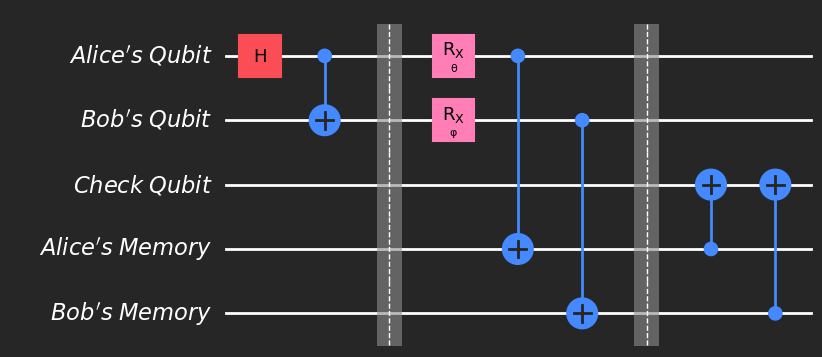

In [4]:
qr_a_mem = QuantumRegister(1, 'Alice\'s Memory')
qr_b_mem = QuantumRegister(1, 'Bob\'s Memory')

qc_mod = QuantumCircuit(qr_a, qr_b, qr_check, qr_a_mem, qr_b_mem)
qc_mod.h(qr_a)
qc_mod.cx(qr_a, qr_b)

qc_mod.barrier()

qc_mod.rx(theta, qr_a)
qc_mod.rx(phi, qr_b)
qc_mod.cx(qr_a, qr_a_mem)
qc_mod.cx(qr_b, qr_b_mem)

qc_mod.barrier()
qc_mod.cx(qr_a_mem, qr_check)
qc_mod.cx(qr_b_mem, qr_check)

qc_mod.draw('mpl', style = 'iqx-dark')

Here, Alice and Bob's Qubits aren't single probabilistic outcomes; the overall description of measurements is **unitary,** maintaining the superposition of outcomes retrieved by our observers, freeing them from the assumptions of Bell's Theorem.

The 'local approach or formulation' can also serve to unify the principles of quantum mechanics and general relativity, as it doesn't rely on the concept of nonlocality, a broad goal for the Standard Model of Particle Physics.